In [1]:
import torch
import numpy as np
from models.generator import DepthNet
from models.generator import PoseNet
from torchvision import transforms
from PIL import Image
from models.discriminator import Discriminator
# from torchsummary import summary
import matplotlib.pyplot as plt
import open3d as o3d
import sys

from models.GAN import DPGAN

torch.Size([1, 3, 352, 1216])
torch.Size([1, 352, 1216])


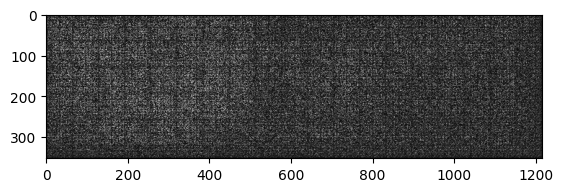

In [2]:
img = Image.open("models/1.png")
transform = transforms.ToTensor()
img = transform(img)
img = img[None, :, :, :]
print(img.shape)

model = DepthNet()
depth = model(img)
depth = torch.squeeze(depth, dim=0)
print(depth.shape)

plt.imshow(np.transpose(depth.detach().numpy(), (1,2,0)), cmap="gray");

In [3]:
dpgan = DPGAN()
# dpgan.to('cuda')
# dpgan.train(None,5,10)

In [4]:
dpgan.train_model(None,5,10)

Training epoch 0 of 10
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Generator loss: 23.638771057128906, Discriminator loss: 2.5435643196105957
---------------------------------------------------------
Training epoch 1 of 10


KeyboardInterrupt: 